In [1]:
import requests
import pandas as pd
from datetime import datetime
import os
import gzip
import shutil

In [2]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# Define the symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# Define the URL for the FMP historical data endpoint
url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{stock_symbol}?from=2004-10-01&to={datetime.now().strftime("%Y-%m-%d")}&apikey={api_key}'

# Make the request to the FMP API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    data = response.json()

    # Extract the historical data
    if 'historical' in data:
        historical_data = data['historical']

        # Convert to a pandas DataFrame
        index_data = pd.DataFrame(historical_data)

        # Display the DataFrame
        print(index_data)
    else:
        print("No 'historical' data found in the response.")
else:
    print(f'Failed to retrieve data: {response.status_code}')


            date         open         high          low        close  \
0     2023-12-29  4518.120120  4536.439940  4517.310060  4518.149900   
1     2023-12-28  4536.680180  4542.750000  4512.640140  4514.379880   
2     2023-12-27  4521.799800  4542.330080  4520.509770  4528.379880   
3     2023-12-22  4520.600100  4528.049800  4505.729980  4521.470210   
4     2023-12-21  4522.490230  4524.859860  4503.359860  4524.859860   
...          ...          ...          ...          ...          ...   
4863  2004-10-07  2834.620117  2834.620117  2834.620117  2834.620117   
4864  2004-10-06  2831.879883  2831.879883  2831.879883  2831.879883   
4865  2004-10-05  2830.120117  2830.120117  2830.120117  2830.120117   
4866  2004-10-04  2823.459961  2823.459961  2823.459961  2823.459961   
4867  2004-10-01  2796.080078  2796.080078  2796.080078  2796.080078   

         adjClose    volume  unadjustedVolume    change  changePercent  \
0     4518.149900         0                 0   0.02978      

In [3]:
# Dataset code
dataset_code = "irt_euryld_d"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")


Dataset downloaded successfully.
Dataset unzipped successfully.


In [4]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'irt_euryld_d.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 'yld_curv', 'maturity', 'bonds', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['yld_curv'] == 'SPOT_RT') & 
    (structured_data['bonds'] == 'CGB_EA')
]

# Drop unnecessary columns
structured_data.drop(['freq', 'geo'], axis=1, inplace=True)

# Filter for date range (from October 1, 2004, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2004-10-01 ']
structured_data = structured_data[['yld_curv', 'maturity', 'bonds'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


/tmp/ipykernel_3708/3711088935.py:10: DtypeWarning: Columns (4417) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t')


In [5]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[3:]  # Assuming date columns start from the 4th column
data_for_melting = structured_data[['maturity'] + list(date_columns)]

# Melt the DataFrame to change its structure
interest_data = pd.melt(data_for_melting, id_vars=['maturity'], var_name='Period', value_name='Rate')

# Rearrange the columns
interest_data = interest_data[['Period', 'maturity', 'Rate']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(interest_data.head(10))

        Period maturity     Rate
0  2004-10-01       M10  2.22092
1  2004-10-01       M11  2.24739
2  2004-10-01        M3  2.03426
3  2004-10-01        M4  2.06099
4  2004-10-01        M5  2.08772
5  2004-10-01        M6  2.11444
6  2004-10-01        M7  2.14113
7  2004-10-01        M8  2.16778
8  2004-10-01        M9  2.19438
9  2004-10-01        Y1  2.27378


In [6]:
# Dataset code
dataset_code = "namq_10_gdp"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")


Dataset downloaded successfully.
Dataset unzipped successfully.


In [7]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'namq_10_gdp.tsv'  # Replace with your file name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 'unit', 'na_item', 's_adj', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Filter for the specified columns and date range (from '2004-Q4' onwards)
date_columns = structured_data.columns[5:]
dates_from_2004_Q4 = date_columns[date_columns >= '2004-Q4 ']
structured_data = structured_data[['freq', 'unit', 'na_item', 's_adj', 'geo'] + list(dates_from_2004_Q4)]

# Filter for specific values in columns
structured_data = structured_data[(structured_data['unit'] == 'CP_MEUR') & (structured_data['na_item'] == 'SCA') & (structured_data['s_adj'] == 'B1GQ')]

# Drop the index column and reset the index
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)
print(structured_data.head(100))

Current Working Directory: /home/fabiopoli/Desktop
   freq     unit na_item s_adj        geo    2004-Q4     2005-Q1     2005-Q2   \
0     Q  CP_MEUR     SCA  B1GQ         AT    61705.5     62215.6     63245.1    
1     Q  CP_MEUR     SCA  B1GQ         BE    75495.0     76092.0     77013.0    
2     Q  CP_MEUR     SCA  B1GQ         BG     5435.8      5732.2      5912.5    
3     Q  CP_MEUR     SCA  B1GQ         CH    82469.1     82323.3     83536.9    
4     Q  CP_MEUR     SCA  B1GQ         CY     3579.8      3659.5      3727.7    
5     Q  CP_MEUR     SCA  B1GQ         CZ    25738.7     26831.6     26970.4    
6     Q  CP_MEUR     SCA  B1GQ         DE   564327.0    565448.0    568628.0    
7     Q  CP_MEUR     SCA  B1GQ         DK    51691.6     52056.7     53070.6    
8     Q  CP_MEUR     SCA  B1GQ         EA  2029982.8   2041768.4   2063197.8    
9     Q  CP_MEUR     SCA  B1GQ       EA12  2029982.8   2041768.4   2063197.8    
10    Q  CP_MEUR     SCA  B1GQ       EA19  2061380.1   207

In [8]:
# Assuming structured_data is already created from the first part of your code

# Filter out only the columns with date values for melting
date_columns = structured_data.columns[5:]  # Assuming date columns start from the 6th column
data_for_melting = structured_data[['geo'] + list(date_columns)]

# Melt the DataFrame to change its structure
gdp_data = pd.melt(data_for_melting, id_vars=['geo'], var_name='Period', value_name='GDP')

# Rearrange the columns
gdp_data = gdp_data[['Period', 'geo', 'GDP']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(gdp_data.head(10))


     Period   geo         GDP
0  2004-Q4     AT    61705.5 
1  2004-Q4     BE    75495.0 
2  2004-Q4     BG     5435.8 
3  2004-Q4     CH    82469.1 
4  2004-Q4     CY     3579.8 
5  2004-Q4     CZ    25738.7 
6  2004-Q4     DE   564327.0 
7  2004-Q4     DK    51691.6 
8  2004-Q4     EA  2029982.8 
9  2004-Q4   EA12  2029982.8 


In [24]:
# Dataset code
dataset_code = "prc_hicp_midx"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")


Dataset downloaded successfully.
Dataset unzipped successfully.


In [36]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'prc_hicp_midx.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 'unit', 'coicop', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['unit'] == 'I15') & 
    (structured_data['coicop'] == 'CP00')
]

# Drop unnecessary columns
structured_data.drop(['freq'], axis=1, inplace=True)

# Filter for date range (from January 1, 2005, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2004-10-01 ']
structured_data = structured_data[['unit', 'coicop', 'geo'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [37]:
# Assuming structured_data is already created from the first part of your code

# Filter out only the columns with date values for melting
date_columns = structured_data.columns[5:]  # Assuming date columns start from the 6th column
data_for_melting = structured_data[['geo'] + list(date_columns)]

# Melt the DataFrame to change its structure
inflation_data = pd.melt(data_for_melting, id_vars=['geo'], var_name='Period', value_name='Inflation')

# Rearrange the columns
inflation_data = inflation_data[['Period', 'geo', 'Inflation']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(inflation_data.head(10))


     Period geo Inflation
0  2005-01   AL        : 
1  2005-01   AT    81.60 
2  2005-01   BE    80.14 
3  2005-01   BG    68.60 
4  2005-01   CH    96.50 
5  2005-01   CY    83.38 
6  2005-01   CZ     80.8 
7  2005-01   DE     84.3 
8  2005-01   DK     83.4 
9  2005-01   EA    83.32 


In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, trim
import requests
import pandas as pd
from datetime import datetime

# Create a Spark session
spark = SparkSession.builder \
    .appName("Stock Market Trends Analysis") \
    .getOrCreate()

# Assuming index_data and interest_data are already defined as pandas DataFrames

# Convert the pandas DataFrames to Spark DataFrames
index_df = spark.createDataFrame(index_data)
interest_df = spark.createDataFrame(interest_data)

# Trim and convert 'date' in index_df and 'Period' in interest_df to DateType
index_df = index_df.withColumn("date", to_date(trim(col("date")), "yyyy-MM-dd"))
interest_df = interest_df.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))

# Create Temporary Views
index_df.createOrReplaceTempView("indexView")
interest_df.createOrReplaceTempView("interestView")

# SQL Query for Joining
join_query = """
SELECT i.date, i.open, i.high, i.low, i.close, i.volume, r.Rate, r.maturity
FROM indexView i
LEFT JOIN interestView r ON i.date = r.Period
"""

# Execute the query
joined_df = spark.sql(join_query)

# Show the result
joined_df.show(400)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/29 17:14:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/12/29 17:14:47 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/12/29 17:15:09 WARN TaskSetManager: Stage 1 contains a task of very large size (8865 KiB). The maximum recommended task size is 1000 KiB.


+----------+------------+------------+------------+------------+------+-------+--------+
|      date|        open|        high|         low|       close|volume|   Rate|maturity|
+----------+------------+------------+------------+------------+------+-------+--------+
|2010-04-07|2988.4899902|2990.8999023|2968.1398926|2974.6201172|     0|0.64024|     M10|
|2010-04-07|2988.4899902|2990.8999023|2968.1398926|2974.6201172|     0|0.68102|     M11|
|2010-04-07|2988.4899902|2990.8999023|2968.1398926|2974.6201172|     0|0.36001|      M3|
|2010-04-07|2988.4899902|2990.8999023|2968.1398926|2974.6201172|     0|0.39928|      M4|
|2010-04-07|2988.4899902|2990.8999023|2968.1398926|2974.6201172|     0|0.43885|      M5|
|2010-04-07|2988.4899902|2990.8999023|2968.1398926|2974.6201172|     0| 0.4787|      M6|
|2010-04-07|2988.4899902|2990.8999023|2968.1398926|2974.6201172|     0|0.51879|      M7|
|2010-04-07|2988.4899902|2990.8999023|2968.1398926|2974.6201172|     0|0.55909|      M8|
|2010-04-07|2988.4899

23/12/29 17:24:22 WARN TaskSetManager: Stage 11 contains a task of very large size (8865 KiB). The maximum recommended task size is 1000 KiB.


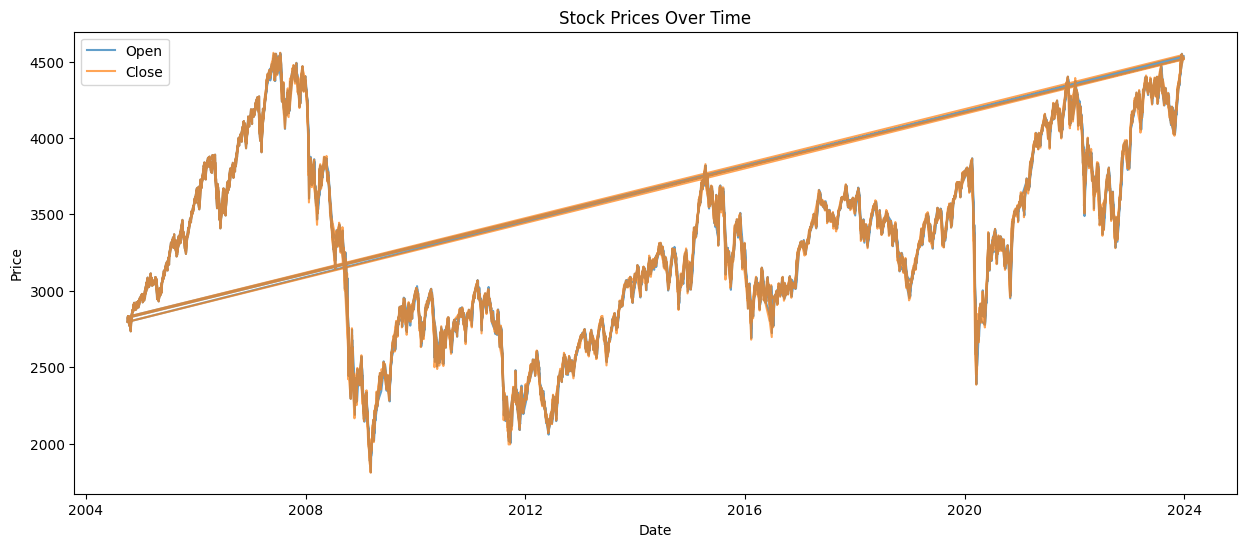

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'joined_df' is your PySpark DataFrame

# Convert PySpark DataFrame to pandas DataFrame
joined_df_pandas = joined_df.toPandas()

# Convert 'date' column to datetime format
joined_df_pandas['date'] = pd.to_datetime(joined_df_pandas['date'])

# Plotting stock prices
plt.figure(figsize=(15, 6))
plt.plot(joined_df_pandas['date'], joined_df_pandas['open'], label='Open', alpha=0.7)
plt.plot(joined_df_pandas['date'], joined_df_pandas['close'], label='Close', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()


In [23]:
from pyspark.sql.functions import col, count, when, isnan

# DataFrame: joined_df

numeric_column_types = ['int', 'double', 'float', 'long']

# Counting zeros and nulls for each column
for column in joined_df.columns:
    # Check if the column is numeric
    if str(joined_df.schema[column].dataType) in numeric_column_types:
        zero_count = joined_df.filter(col(column) == 0).count()
        null_or_nan_count = joined_df.filter(col(column).isNull() | isnan(col(column))).count()
    else:
        zero_count = 'N/A' # Not applicable for non-numeric columns
        null_or_nan_count = joined_df.filter(col(column).isNull()).count() # Check only for nulls in non-numeric columns

    print(f"Column '{column}': Zeros = {zero_count}, Nulls or NaNs = {null_or_nan_count}")


23/12/29 18:45:17 WARN TaskSetManager: Stage 52 contains a task of very large size (8865 KiB). The maximum recommended task size is 1000 KiB.


Column 'date': Zeros = N/A, Nulls or NaNs = 0


23/12/29 18:45:19 WARN TaskSetManager: Stage 56 contains a task of very large size (8865 KiB). The maximum recommended task size is 1000 KiB.


Column 'open': Zeros = N/A, Nulls or NaNs = 0


23/12/29 18:45:21 WARN TaskSetManager: Stage 60 contains a task of very large size (8865 KiB). The maximum recommended task size is 1000 KiB.


Column 'high': Zeros = N/A, Nulls or NaNs = 0


23/12/29 18:45:23 WARN TaskSetManager: Stage 64 contains a task of very large size (8865 KiB). The maximum recommended task size is 1000 KiB.


Column 'low': Zeros = N/A, Nulls or NaNs = 0


23/12/29 18:45:25 WARN TaskSetManager: Stage 68 contains a task of very large size (8865 KiB). The maximum recommended task size is 1000 KiB.


Column 'close': Zeros = N/A, Nulls or NaNs = 0


23/12/29 18:45:27 WARN TaskSetManager: Stage 72 contains a task of very large size (8865 KiB). The maximum recommended task size is 1000 KiB.


Column 'volume': Zeros = N/A, Nulls or NaNs = 0


23/12/29 18:45:29 WARN TaskSetManager: Stage 76 contains a task of very large size (8865 KiB). The maximum recommended task size is 1000 KiB.


Column 'Rate': Zeros = N/A, Nulls or NaNs = 18


23/12/29 18:45:33 WARN TaskSetManager: Stage 85 contains a task of very large size (8865 KiB). The maximum recommended task size is 1000 KiB.


Column 'maturity': Zeros = N/A, Nulls or NaNs = 18


In [20]:
# Print the schema of the DataFrame
joined_df.printSchema()

# Count the number of rows in the DataFrame
print("Number of rows:", joined_df.count())

# Show statistical summaries of the DataFrame
joined_df.describe().show()

root
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: long (nullable = true)
 |-- Rate: string (nullable = true)
 |-- maturity: string (nullable = true)



23/12/29 18:42:22 WARN TaskSetManager: Stage 34 contains a task of very large size (8865 KiB). The maximum recommended task size is 1000 KiB.


Number of rows: 1736318


23/12/29 18:42:31 WARN TaskSetManager: Stage 43 contains a task of very large size (8865 KiB). The maximum recommended task size is 1000 KiB.


+-------+-----------------+-----------------+------------------+-----------------+--------------------+------------------+--------+
|summary|             open|             high|               low|            close|              volume|              Rate|maturity|
+-------+-----------------+-----------------+------------------+-----------------+--------------------+------------------+--------+
|  count|          1736318|          1736318|           1736318|          1736318|             1736318|           1736300| 1736300|
|   mean|3307.778656095865|3328.210894954582|3285.5734446190727|3307.513240183213|2.3138447554728456E7|2.5951861921268926|    NULL|
| stddev| 583.418083258925|581.7099526597742|  585.837431049646|583.7582766142275| 2.573474646354724E7|1.6261819636066506|    NULL|
|    min|     1812.7800293|          1823.25|      1765.4899902|     1809.9799805|                   0|            -0.001|     M10|
|    max|     4555.7797852|       4593.10986|        4542.10986|     4557.56

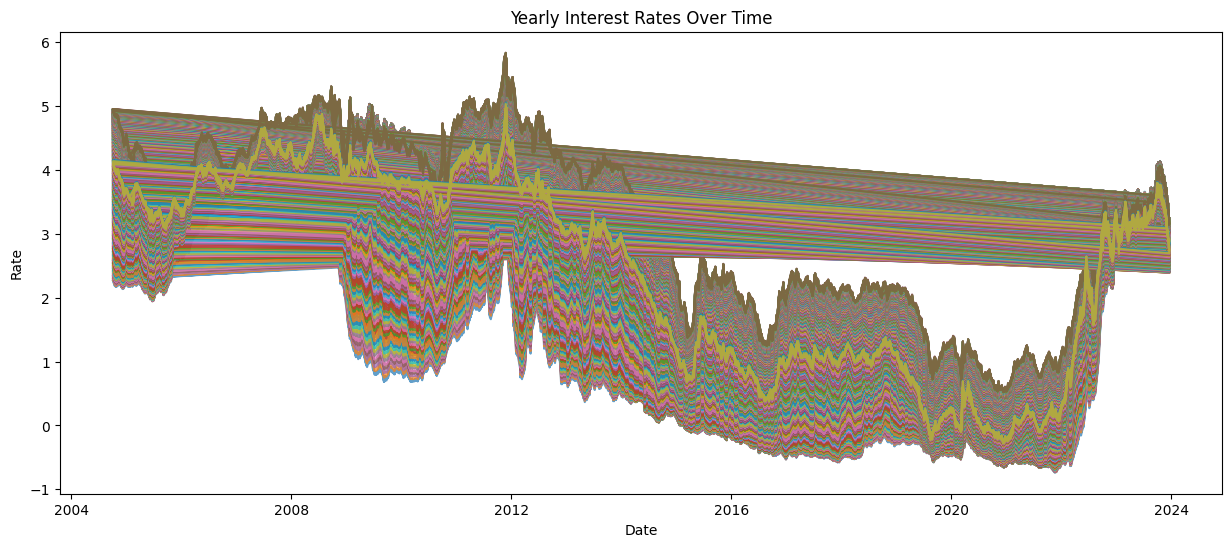

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'joined_df_pandas' is your pandas DataFrame

# Convert 'date' column to datetime format
joined_df_pandas['date'] = pd.to_datetime(joined_df_pandas['date'])
joined_df_pandas['Rate'] = pd.to_numeric(joined_df_pandas['Rate'], errors='coerce')

# Fill NaN values in 'maturity' column
joined_df_pandas['maturity'] = joined_df_pandas['maturity'].fillna('')

# Filter only rows where 'maturity' matches the pattern 'Y' followed by a number
yearly_maturities = joined_df_pandas[joined_df_pandas['maturity'].str.match(r'Y\d+')]

# Plotting rates for each yearly maturity
plt.figure(figsize=(15, 6))
for maturity in sorted(yearly_maturities['maturity'].unique()):
    subset = yearly_maturities[yearly_maturities['maturity'] == maturity]
    plt.plot(subset['date'], subset['Rate'], label=maturity, alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Yearly Interest Rates Over Time')
plt.show()
